In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/symptom2disease/Symptom2Disease.csv


# Data loading and exploring

In [2]:
data = pd.read_csv("/kaggle/input/symptom2disease/Symptom2Disease.csv")

In [3]:
data.head()

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [4]:
data["label"].unique()

array(['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox',
       'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
       'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne',
       'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Jaundice', 'Malaria',
       'urinary tract infection', 'allergy',
       'gastroesophageal reflux disease', 'drug reaction',
       'peptic ulcer disease', 'diabetes'], dtype=object)

In [5]:
data['label'].value_counts()

Psoriasis                          50
Varicose Veins                     50
peptic ulcer disease               50
drug reaction                      50
gastroesophageal reflux disease    50
allergy                            50
urinary tract infection            50
Malaria                            50
Jaundice                           50
Cervical spondylosis               50
Migraine                           50
Hypertension                       50
Bronchial Asthma                   50
Acne                               50
Arthritis                          50
Dimorphic Hemorrhoids              50
Pneumonia                          50
Common Cold                        50
Fungal infection                   50
Dengue                             50
Impetigo                           50
Chicken pox                        50
Typhoid                            50
diabetes                           50
Name: label, dtype: int64

In [6]:
num_of_classes = data['label'].nunique()
num_of_classes

24

In [7]:
data["text"][0]

'I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.'

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

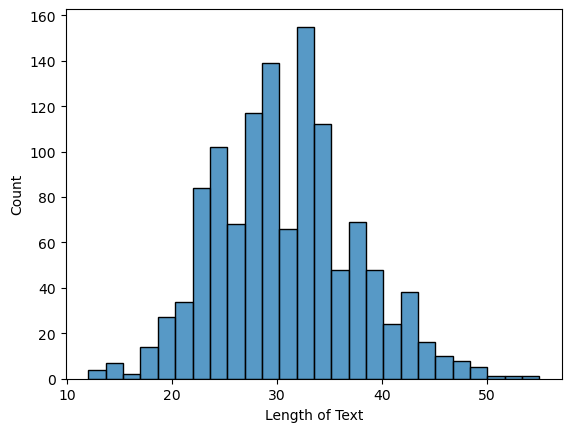

In [9]:
text_length = data['text'].apply(lambda x: len(x.split(' ')))
sns.histplot(text_length)
plt.xlabel('Length of Text')
plt.show()

# Data preprocessing

In [10]:
X = data['text']
y = data['label']

In [11]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_label, test_label = train_test_split(X, 
                                                                            y, 
                                                                            test_size=0.1, 
                                                                            random_state=42)

In [12]:
train_sentences[:5]

533     I've been experiencing muscular weakness and s...
903     I have been getting blood in my pee. Sometimes...
1003    I have a persistent sour taste in my mouth, ev...
1069    My monthly cycle has changed, and I've had an ...
413     My fever is really high, and I'm having troubl...
Name: text, dtype: object

In [13]:
train_label[:5]

533                           Arthritis
903             urinary tract infection
1003    gastroesophageal reflux disease
1069                      drug reaction
413                           Pneumonia
Name: label, dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_label)
test_labels_encoded = label_encoder.fit_transform(test_label)

In [15]:
train_labels_encoded[:5]

array([ 1, 23, 21, 20, 14])

In [16]:
test_labels_encoded[:5]

array([19, 12, 16, 14, 17])

In [17]:
train_sentences.shape, train_labels_encoded.shape

((1080,), (1080,))

In [18]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
sent_lens[:10]

[27, 24, 28, 21, 35, 23, 47, 21, 27, 40]

In [19]:
import numpy as np
avg_len = np.mean(sent_lens)
avg_len

30.677777777777777

In [20]:
min(sent_lens), max(sent_lens)

(12, 55)

In [21]:
out_len_seq = np.percentile(sent_lens, 95)
out_len_seq

43.0

# Text vectorization (tokenization)

In [22]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [23]:
text_vectorizer = TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None)

In [24]:
max_vocab_length = 10000
max_length = 45
text_vectorizer = TextVectorization(
    max_tokens=max_vocab_length,
    output_mode='int',
    output_sequence_length=max_length)

In [25]:
text_vectorizer.adapt(train_sentences)

In [26]:
import random
random_sentence = random.choice(train_sentences)
print(random_sentence)
print(text_vectorizer([random_sentence]))

Doctor, I have these red rashes that keep popping up and my skin is continuously itching. In addition, I've observed some odd color-different spots on my skin, as well as some little nodules on my skin that appear to be expanding.
tf.Tensor(
[[ 485    4    7   97   52   86   27  410 1245   48    2    3   16   12
   748   57   13   99    8  405   54  520 1051  119   21    3   16   44
   107   44   54  166  625   21    3   16   27  493    9  189 1400    0
     0    0    0]], shape=(1, 45), dtype=int64)


# Embedding

In [27]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length, 
                             output_dim=128, 
                             input_length=max_length,
                             embeddings_initializer='uniform')
embedding

In [28]:
print(embedding(text_vectorizer([random_sentence])))

tf.Tensor(
[[[ 0.004161    0.03068556 -0.028077   ...  0.02218545  0.03770125
   -0.04679653]
  [ 0.03833604  0.027257    0.03239336 ...  0.04472469 -0.00678495
    0.02348628]
  [-0.01872725  0.01334157 -0.03425949 ...  0.00916827 -0.0480854
    0.00197337]
  ...
  [ 0.03202795  0.00684785 -0.00436336 ...  0.04842389  0.01281493
    0.03413877]
  [ 0.03202795  0.00684785 -0.00436336 ...  0.04842389  0.01281493
    0.03413877]
  [ 0.03202795  0.00684785 -0.00436336 ...  0.04842389  0.01281493
    0.03413877]]], shape=(1, 45, 128), dtype=float32)


# Naive bayes

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [30]:
model_0 = Pipeline([
        ("tfidf", TfidfVectorizer()),
        ("clf", MultinomialNB()),
     ])

model_0.fit(train_sentences, train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [31]:
baseline_score = model_0.score(test_sentences, test_label)

In [32]:
print(baseline_score*100)

93.33333333333333


# Conv1D model

In [33]:
import tensorflow as tf
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_of_classes, activation = "sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="dense_model")

In [34]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer = tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [35]:
train_sentences.shape, train_label.shape

((1080,), (1080,))

In [36]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_label.to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_label.to_numpy().reshape(-1, 1))
train_labels_one_hot[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [37]:
test_labels_one_hot.shape

(120, 24)

In [38]:
type(train_sentences), type(np.array(train_sentences)), type(train_labels_one_hot)

(pandas.core.series.Series, numpy.ndarray, numpy.ndarray)

In [39]:
train_labels_one_hot[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [40]:
model_1_history = model_1.fit(np.array(train_sentences), 
                              train_labels_one_hot,
                              epochs=100,
                              validation_data=(np.array(test_sentences), test_labels_one_hot)) 

Epoch 1/100
34/34 [==============================] - 10s 173ms/step - loss: 3.1562 - accuracy: 0.2926 - val_loss: 3.1310 - val_accuracy: 0.5667
Epoch 2/100
34/34 [==============================] - 3s 80ms/step - loss: 3.0925 - accuracy: 0.6972 - val_loss: 3.0638 - val_accuracy: 0.6583
Epoch 3/100
34/34 [==============================] - 2s 43ms/step - loss: 2.9998 - accuracy: 0.7889 - val_loss: 2.9602 - val_accuracy: 0.6667
Epoch 4/100
34/34 [==============================] - 2s 38ms/step - loss: 2.8653 - accuracy: 0.8472 - val_loss: 2.8159 - val_accuracy: 0.7167
Epoch 5/100
34/34 [==============================] - 2s 42ms/step - loss: 2.6872 - accuracy: 0.8491 - val_loss: 2.6342 - val_accuracy: 0.7167
Epoch 6/100
34/34 [==============================] - 1s 29ms/step - loss: 2.4731 - accuracy: 0.8815 - val_loss: 2.4199 - val_accuracy: 0.7417
Epoch 7/100
34/34 [==============================] - 1s 23ms/step - loss: 2.2376 - accuracy: 0.8833 - val_loss: 2.2012 - val_accuracy: 0.7500
Epoc

In [41]:
model_1.evaluate(test_sentences, np.array(test_labels_one_hot))

4/4 [==============================] - 0s 5ms/step - loss: 0.0851 - accuracy: 1.0000


[0.08511494100093842, 1.0]

In [42]:
new_text = ["This is a new text to classify"]

predictions = model_1.predict(new_text)  # Wrap the vectorized text in an array

# Define the class labels
labels = ['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox', 'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
          'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne', 'Bronchial Asthma', 'Hypertension', 'Migraine',
          'Cervical spondylosis', 'Jaundice', 'Malaria', 'urinary tract infection', 'allergy',
          'gastroesophageal reflux disease', 'drug reaction', 'peptic ulcer disease', 'diabetes']

pneumonia_prob = predictions[0, labels.index('Pneumonia')]

# Convert the probability to four decimal places
pneumonia_prob_formatted = "{:.4f}".format(pneumonia_prob)

# Print the predicted probability for "Pneumonia"
print("Probability of Pneumonia: {}".format(pneumonia_prob_formatted))

1/1 [==============================] - 0s 153ms/step
Probability of Pneumonia: 0.0031


In [43]:
model_1.save('Conv1_model', save_format='tf')

<AxesSubplot:>

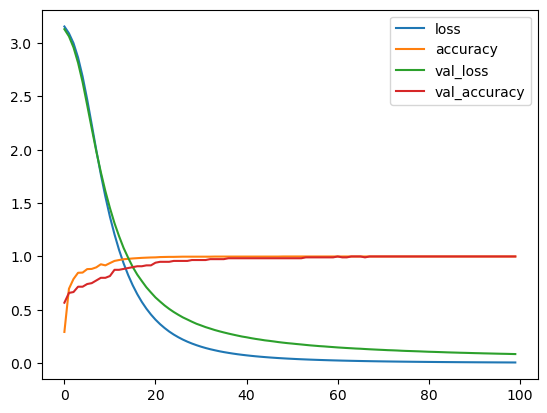

In [44]:
pd.DataFrame(model_1_history.history).plot()

# Transfer learning (USE)

In [45]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [46]:
from tensorflow.keras import layers
import tensorflow as tf

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [],
                                        dtype=tf.string,
                                        trainable = False,
                                        name = "USE")

model_2 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(512, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_of_classes, activation="softmax")
    ], name ="USE_model"
)

In [47]:
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer = tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [48]:
model_2_history = model_2.fit(np.array(train_sentences), 
                              train_labels_one_hot,
                              epochs=50,
                              validation_data=(np.array(test_sentences), test_labels_one_hot)) 

Epoch 1/50
34/34 [==============================] - 6s 30ms/step - loss: 2.7843 - accuracy: 0.4472 - val_loss: 2.1447 - val_accuracy: 0.6000
Epoch 2/50
34/34 [==============================] - 1s 16ms/step - loss: 1.3111 - accuracy: 0.7796 - val_loss: 0.8714 - val_accuracy: 0.8333
Epoch 3/50
34/34 [==============================] - 1s 15ms/step - loss: 0.5634 - accuracy: 0.8787 - val_loss: 0.5139 - val_accuracy: 0.8750
Epoch 4/50
34/34 [==============================] - 1s 17ms/step - loss: 0.3127 - accuracy: 0.9380 - val_loss: 0.3455 - val_accuracy: 0.9250
Epoch 5/50
34/34 [==============================] - 1s 15ms/step - loss: 0.2042 - accuracy: 0.9648 - val_loss: 0.2286 - val_accuracy: 0.9500
Epoch 6/50
34/34 [==============================] - 0s 14ms/step - loss: 0.1404 - accuracy: 0.9833 - val_loss: 0.1905 - val_accuracy: 0.9500
Epoch 7/50
34/34 [==============================] - 0s 14ms/step - loss: 0.0972 - accuracy: 0.9907 - val_loss: 0.1435 - val_accuracy: 0.9833
Epoch 8/50
34

In [49]:
model_2.evaluate(np.array(test_sentences), np.array(test_labels_one_hot))

4/4 [==============================] - 0s 15ms/step - loss: 0.0606 - accuracy: 0.9750


[0.06063241884112358, 0.9750000238418579]

In [50]:
new_text = ["This is a new text to classify"]

predictions = model_2.predict(new_text)  # Wrap the vectorized text in an array

predictions

1/1 [==============================] - 0s 432ms/step


array([[0.03870001, 0.11615928, 0.05536829, 0.03885481, 0.01870256,
        0.00464289, 0.00285989, 0.00662289, 0.15643871, 0.0021156 ,
        0.00237979, 0.00749414, 0.00189563, 0.00309166, 0.00264437,
        0.02392649, 0.02448164, 0.00517003, 0.00251387, 0.01458008,
        0.35222632, 0.0028142 , 0.00143976, 0.11487708]], dtype=float32)

In [51]:
# Define the class labels
labels = ['Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox', 'Impetigo', 'Dengue', 'Fungal infection', 'Common Cold',
          'Pneumonia', 'Dimorphic Hemorrhoids', 'Arthritis', 'Acne', 'Bronchial Asthma', 'Hypertension', 'Migraine',
          'Cervical spondylosis', 'Jaundice', 'Malaria', 'urinary tract infection', 'allergy',
          'gastroesophageal reflux disease', 'drug reaction', 'peptic ulcer disease', 'diabetes']

pneumonia_prob = predictions[0, labels.index('Pneumonia')]

# Convert the probability to four decimal places
pneumonia_prob_formatted = "{:.4f}".format(pneumonia_prob)

# Print the predicted probability for "Pneumonia"
print("Probability of Pneumonia: {}".format(pneumonia_prob_formatted))

Probability of Pneumonia: 0.1564


<AxesSubplot:>

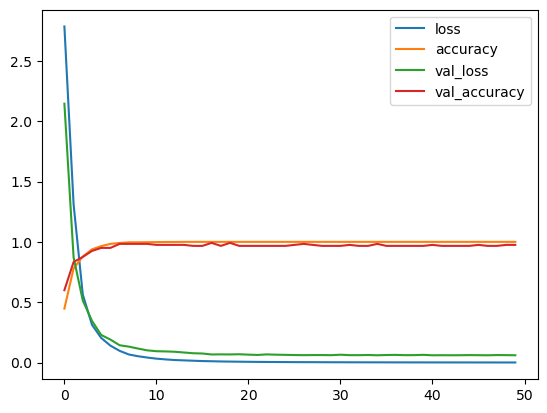

In [52]:
pd.DataFrame(model_2_history.history).plot()